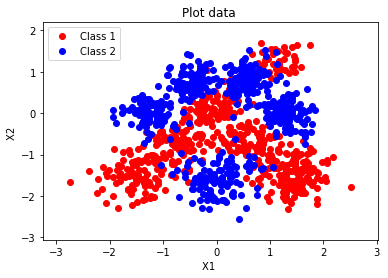

In [2]:
import numpy as np
from DataPlot import *
%matplotlib inline

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# visualize the dataset
plot_data(X, y)



In [3]:
yin = y.reshape(1000, 1)
Xin = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


# split the dataset into training and test sets
indices=np.random.permutation(X.shape[0])
train_id, test_id = indices[:800], indices[800:]
X_train, X_test = Xin[train_id, :], X[test_id, :]
y_train, y_test = yin[train_id], y[test_id]

In [7]:
# define functions for training

def sigmoid(w, X):
    return 1.0 / (1 + np.exp(-np.dot(X, w)))

def gradAscent(dataset, label, weights, learnRate):
    s = sigmoid(weights, dataset)
    gradient = np.dot(dataset.T, np.subtract(label, s))
    weights = weights + learnRate * gradient
    return weights


def train(dataset, label, learnRate, iterations):
    weights = np.ones((3, 1)) # initial weights
    record = np.zeros((iterations,3))
    for i in range(iterations):
        weights = gradAscent(dataset, label, weights, learnRate)
        record[i] = weights.T
    return weights, record

def logLikelihood(dataset, label, record):
    ll = np.zeros(record.shape[0])
    for i in range(record.shape[0]):
        ll[i] = np.mean(np.abs(label - 1 + sigmoid(record[i, :].T, dataset)))
    return ll


In [9]:
weights, record = train(X_train, y_train, 0.01, 500)
ll = logLikelihood(X_train, y_train, record)
ll

array([ 0.50025183,  0.49970043,  0.50033047,  0.49960307,  0.50043376,
        0.49955405,  0.50045541,  0.49955588,  0.50044941,  0.49955543,
        0.50045103,  0.49955555,  0.50045064,  0.49955553,  0.50045074,
        0.49955553,  0.50045071,  0.49955553,  0.50045072,  0.49955553,
        0.50045072,  0.49955553,  0.50045072,  0.49955553,  0.50045072,
        0.49955553,  0.50045072,  0.49955553,  0.50045072,  0.49955553,
        0.50045072,  0.49955553,  0.50045072,  0.49955553,  0.50045072,
        0.49955553,  0.50045072,  0.49955553,  0.50045072,  0.49955553,
        0.50045072,  0.49955553,  0.50045072,  0.49955553,  0.50045072,
        0.49955553,  0.50045072,  0.49955553,  0.50045072,  0.49955553,
        0.50045072,  0.49955553,  0.50045072,  0.49955553,  0.50045072,
        0.49955553,  0.50045072,  0.49955553,  0.50045072,  0.49955553,
        0.50045072,  0.49955553,  0.50045072,  0.49955553,  0.50045072,
        0.49955553,  0.50045072,  0.49955553,  0.50045072,  0.49